### Revisiting curves with conductor approximately 100000
---------------------------------------------------------
We revisit the data constructed from elliptic curves with conductor in the range $100002$ to $100800$.
By using our function
```bin_murmuration```
on this data, the main effect is to smooth out the curve somewhat.

In [0]:
## if running from google colab uncomment:
## !pip install -q ipympl
## from google.colab import output
## output.enable_custom_widget_manager()

In [0]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots
%matplotlib widget

In [0]:
## uncomment the next line if running this notebook locally
## from pyscript.murmur_from_dataframe import bin_murmuration, display_murmuration, display_rescaled_murmuration

## uncomment the next lines if running from google colab
'''def bin_murmuration(ec:pd.DataFrame, primes:pd.Index, x):
  n = len(x); 
  idx = np.digitize(np.outer(np.reciprocal(1.0*ec['conductor']),primes.astype(float)),x);
  counts = np.zeros(shape=x.shape);
  sum_aps = np.zeros(shape=x.shape);
  for i in range(n):
    where = np.equal(idx,i);
    counts[i] = where.sum();
    sum_aps[i] = ec[primes].to_numpy()[where].sum();
  return sum_aps,counts;

def display_murmuration(ec,scale,primes,title,ax,xlim=None,ylim=None):
  for axis in ax:
    axis.clear();
    if xlim:
      axis.set_xlim(*xlim)
    if ylim:
      axis.set_ylim(*ylim)
  t = primes.astype(int)*scale;
  ax[0].plot(t,ec.loc[ec['rank']==1,primes].mean(),'b.');
  ax[1].plot(t,ec.loc[ec['rank']==-1,primes].mean(),'r.');
  ax[2].plot(t,ec[primes].mul(ec['rank'],axis=0).mean(),'c.');
  ax[0].set_title(title+", even rank");
  ax[1].set_title(title+", odd rank");
  ax[2].set_title(title+", combined ranks");

def display_rescaled_murmuration(x,sum_aps_even,counts_even,sum_aps_odd,counts_odd,title,ax,xlim=None,ylim=None):
  for axis in ax:
    axis.clear();
    if xlim:
      axis.set_xlim(*xlim)
    if ylim:
      axis.set_ylim(*ylim)
  ax[0].plot(x,sum_aps_even/counts_even,'b.');
  ax[1].plot(x,sum_aps_odd/counts_odd,'r.');
  ax[2].plot(x,(sum_aps_even-sum_aps_odd)/(counts_even+counts_odd),'c.');
  ax[0].set_title(title+", even");
  ax[1].set_title(title+", odd");
  ax[2].set_title(title+", combined ranks");
'''

In [0]:
local = 'data/'
file = 'cond_200k_1.data'

## uncomment the next lines if running from google colab
## web_path = "https://cocalc.com/share/raw/0448bd6dd0e1a069e5104218be9425b1d08ad4ac/data-science/elliptic-curves/"
## !curl --create-dirs -O --output-dir $local $web_path$local$file

In [3]:
datatype ={'label':np.dtype('str'),'discriminant':np.dtype('O')}
datatype.setdefault(np.dtype('int64'))
ec = pd.read_csv(local + file,
                 delimiter=" ",
                 index_col = 'label',
                 usecols=lambda x:x!='discriminant',
                 dtype = datatype
                )
ec.tail()

,conductor,rank,2,3,5,7,11,13,17,19,...,199873,199877,199889,199909,199921,199931,199933,199961,199967,199999
label,,,,,,,,,,,,,,,,,,,,,
100800.oz1,100800,1,0,0,0,1,4,-2,-2,4,...,654,334,-170,230,450,-356,-434,826,-660,284
100800.oz2,100800,1,0,0,0,1,4,-2,-2,4,...,654,334,-170,230,450,-356,-434,826,-660,284
100800.oz3,100800,1,0,0,0,1,4,-2,-2,4,...,654,334,-170,230,450,-356,-434,826,-660,284
100800.oz4,100800,1,0,0,0,1,4,-2,-2,4,...,654,334,-170,230,450,-356,-434,826,-660,284
100800.pa1,100800,1,0,0,0,1,4,-2,2,-4,...,-114,-582,-642,-46,-526,68,398,-146,-592,376


In [4]:
primes = ec.columns[2:];

In [5]:
N,n = 2,1000;
x = np.linspace(1.0/n,N,n);
sum_aps_even,counts_even = bin_murmuration(ec[ec['rank']%2==0], primes,x);
sum_aps_odd,counts_odd = bin_murmuration(ec[ec['rank']%2==1],primes,x);

In [6]:
scale = 1.0/100000;
ec.loc[ec['rank']%2==1,'rank']=-1;
ec.loc[ec['rank']%2==0,'rank'] =1;

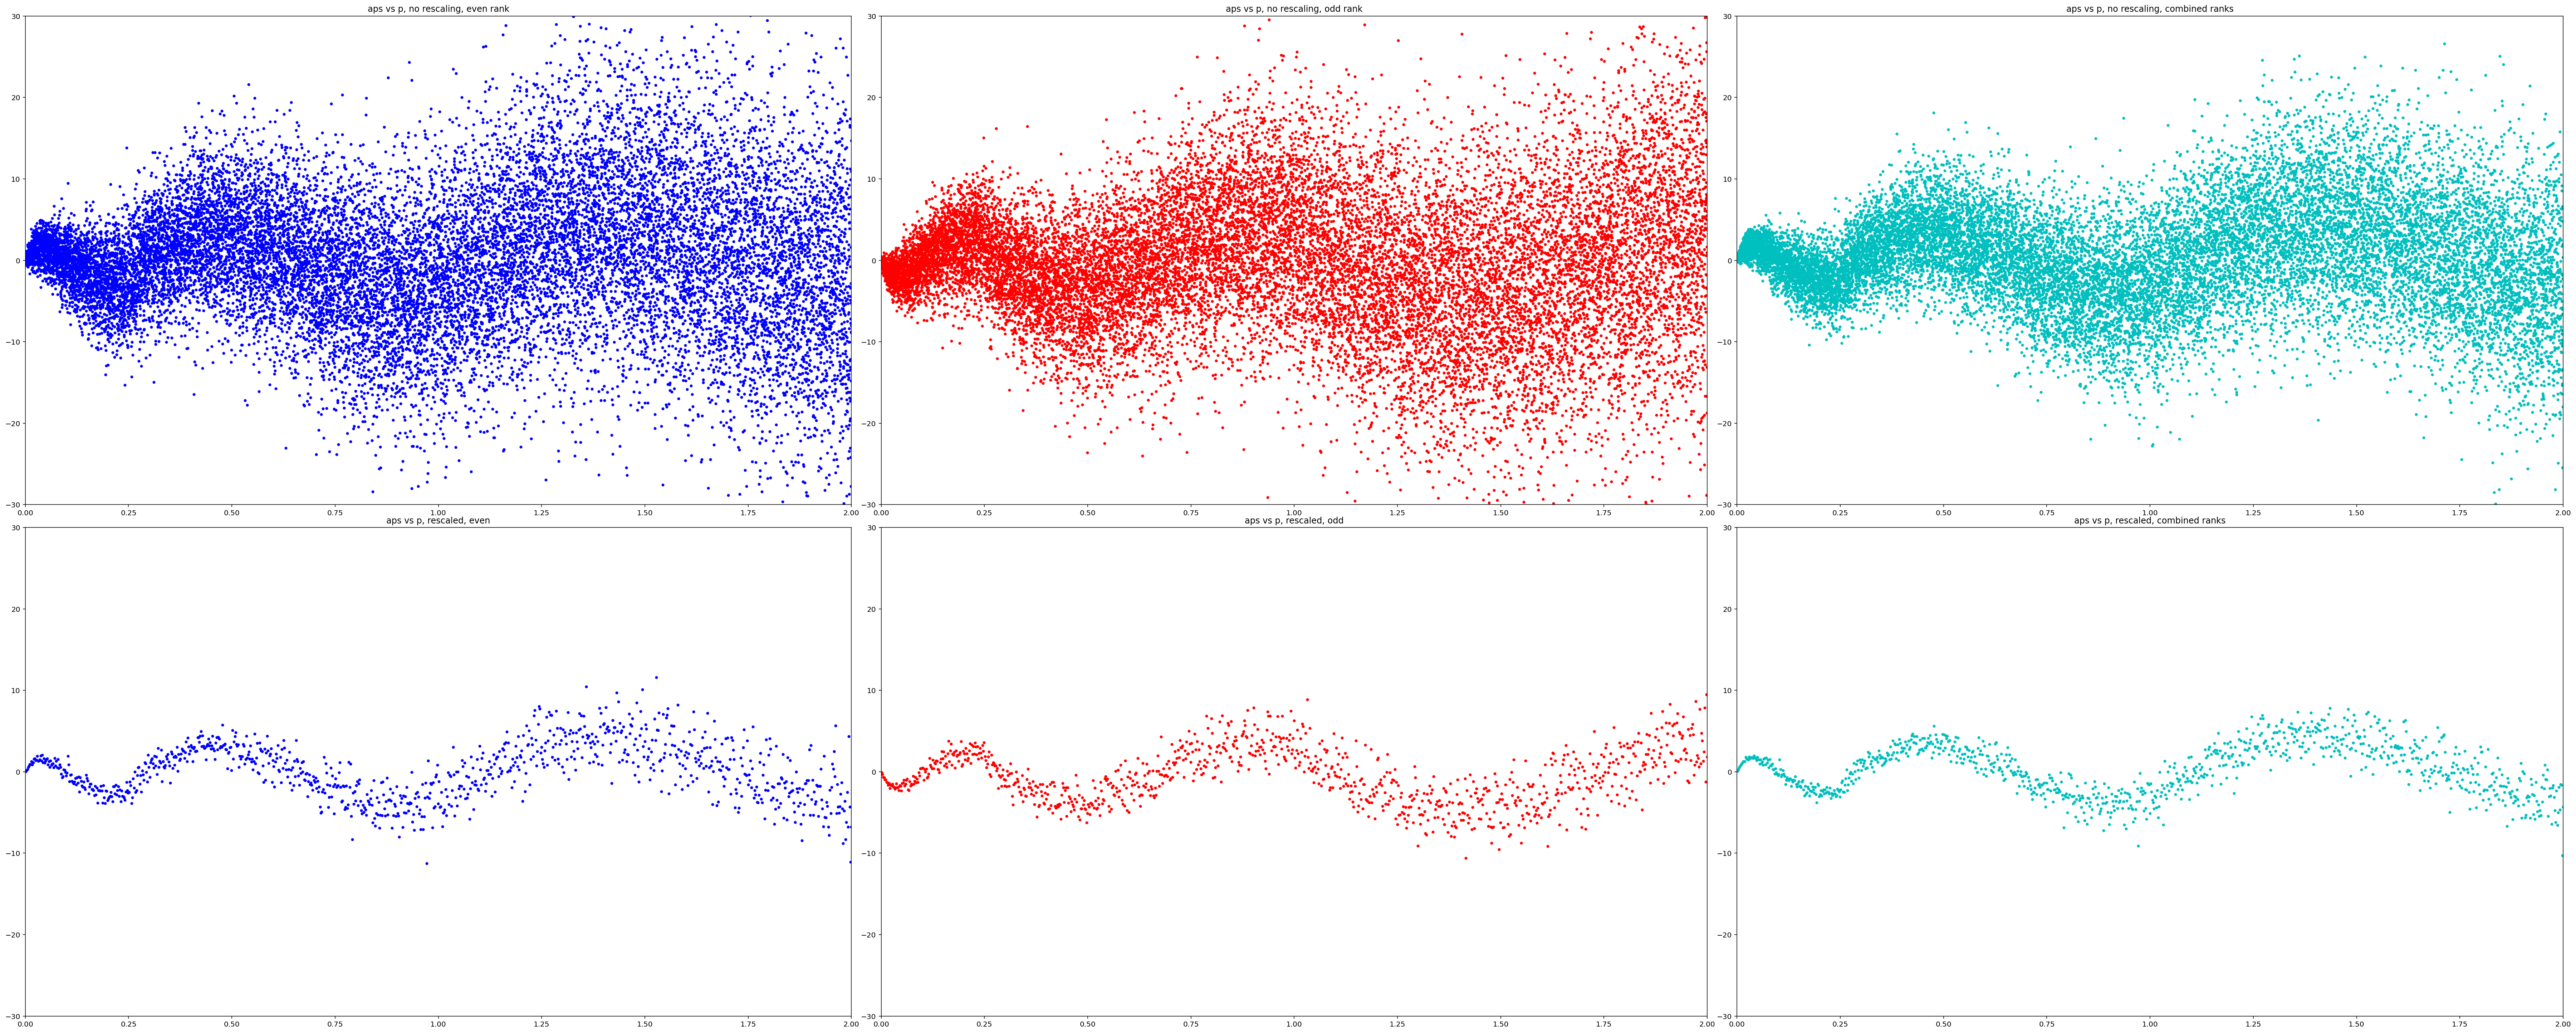

In [7]:
fig, ax = subplots(nrows=2,ncols=3,figsize=(30,10));
fig.tight_layout()
ylims = [(-30,30),(-10,10)]
xlim = (0,2)
display_murmuration(ec,scale,primes,"aps vs p, no rescaling",ax[0],xlim,ylims[0])
display_rescaled_murmuration(x,sum_aps_even,counts_even,sum_aps_odd,counts_odd,"aps vs p, rescaled",ax[1],xlim,ylims[1])

In [8]:
## fig.savefig("media/scaling_vs_no_cond_100k.png")

We are able to see a few of the features that we have seen in the conductor range 1 to 50000.